In [1]:
%matplotlib inline
import matplotlib as mpl
#mpl.use('Agg')
import numpy as np
import pylab as py
import matplotlib.cm as cm
import sys
import os
import errno
import netCDF4 as nc
import glob
import hickle as hkl

## A function to save a dictionary ##
def save(filename,dictionary):
    hkl.dump(dictionary, filename, mode='w')

## A function to load a dictionary ## 
def load(filename):
    dictionary = hkl.load(filename)
    return dictionary

def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise
            
####################
#### smoothening ###
####################

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

a=6371.0e3
R=a

# c=5
# ncfile='/project2/tas1/pragallva/Summer_quarter_2019/exp_data/isca_repeat/HC0_la5m_oc5m/HC0_la5m_oc5m0.nc'
# v_var=nc.Dataset(ncfile,'r')
# sigma_full=v_var['pfull'][::-1]
# sigma_half=v_var['phalf'][::-1]
# lat_o=v_var['lat'][:]

In [26]:
def source(N=30, file='HC0_la5m_oc5m', moment=1):
    momentum = '/project2/tas1/pragallva/Summer_quarter_2019/post_process_data/isca_repeat/data_in_pres_coord/avged_over'\
               +str(N)+'days/'+file+'/momentum_terms.hkl'
    stress = '/project2/tas1/pragallva/Summer_quarter_2019/post_process_data/isca_repeat/data_in_pres_coord/avged_over'\
               +str(N)+'days/'+file+'/surf_stress.hkl'
    coord    = '/project2/tas1/pragallva/Summer_quarter_2019/post_process_data/isca_repeat/data_in_pres_coord/avged_over'\
               +str(N)+'days/'+file+'/coord.hkl'
    if moment == 1:
        return load(momentum), load(stress)
    else : 
        return load(coord)
    
storm_pos=load('/project2/tas1/pragallva/Summer_quarter_2019/post_process_data/isca_repeat/data_in_pres_coord/avged_over30days/storm_pos.hkl')
        
coord   =  source(N=30, moment=0)
lat     =  coord['lat']
pres    =  coord['pres']
MONTHS  =  coord['months_per_year']

m50m_50m_30, s50m_50m_30   =  source(N=30, file='HC0_la50m_oc50m')
m5m_5m_30  , s5m_5m_30     =  source(N=30, file='HC0_la5m_oc5m')
m50m_5m_30 , s50m_5m_30    =  source(N=30, file='HC20_la50m_oc5m')
m5m_50m_30,  s5m_50m_30    =  source(N=30, file='HC20_la5m_oc50m')

# m50m_50m_15, s50m_50m_15  =  source(N=15, file='HC0_la50m_oc50m')
# m5m_5m_15,   s5m_5m_15    =  source(N=15, file='HC0_la5m_oc5m')
# m50m_5m_15,  s50m_5m_15   =  source(N=15, file='HC20_la50m_oc5m')
# m5m_50m_15,  s5m_50m_15   =  source(N=15, file='HC20_la5m_oc50m')

# m50m_50m_5, s50m_50m_5   =  source(N=5,  file='HC0_la50m_oc50m')
# m5m_5m_5,   s5m_5m_5     =  source(N=5,  file='HC0_la5m_oc5m')
# m50m_5m_5,  s50m_5m_5    =  source(N=5,  file='HC20_la50m_oc5m')
# m5m_50m_5,  s5m_50m_5    =  source(N=5,  file='HC20_la5m_oc50m')

In [27]:
exp_30days = [m5m_5m_30, m50m_50m_30]
# exp_15days = [m5m_5m_15, m50m_50m_15, m50m_5m_15, m5m_50m_15 ]
# exp_5days =  [m5m_5m_5, m50m_50m_5, m50m_5m_5, m5m_50m_5 ]

stress_30days = [s5m_5m_30, s50m_50m_30]
# stress_15days = [s5m_5m_15, s50m_50m_15, s50m_5m_15, s5m_50m_15 ]
# stress_5days =  [s5m_5m_5,  s50m_50m_5,  s50m_5m_5,  s5m_50m_5 ]

exp_names  = ['HC0 la5m oc5m', 'HC0 la50m oc50m', 'HC20 la5m oc50m', 'HC20 la50m oc5m' ]

In [28]:
m5m_5m_30.keys()

['EMF',
 'du_w_dp',
 'u_w',
 'divEMF',
 'w_dudp',
 'du_dt',
 'fv_zmean_tmean',
 'zeta_v']

In [29]:
m5m_5m_30['divEMF'].keys()

['div_EMF_zmean_teddy',
 'div_EMF_zeddy_teddy',
 'div_EMF_teddy',
 'div_EMF_zeddy_tmean',
 'div_EMF_zeddy',
 'div_EMF_zeddy2']

In [30]:
def extract_data(days=30, verbose=False):
    if days == 30:
        exps = exp_30days
        stress = stress_30days
    if days == 15 :
        exps = exp_15days
        stress = stress_15days
    if days == 5 :
        exps = exp_5days
        stress = stress_5days
    
    for key, value in m5m_5m_30.items():
      if type(value)==type({}):
             for sub_key, sub_value in value.items():
                globals()[sub_key+str(days)]=[]
                if verbose == True :
                     print sub_key+str(days)
      else :    
                globals()[key+str(days)]=[]
                if verbose == True :
                     print key+str(days),
                        
    for key, value in s5m_5m_30.items():
      if type(value)==type({}):
             for sub_key, sub_value in value.items():
                globals()[sub_key+str(days)]=[]
                if verbose == True :
                     print sub_key+str(days)
      else :    
                globals()[key+str(days)]=[]
                if verbose == True :
                     print key+str(days),
                        
                        

                        
    for d in range(len(exps)):
        for key, value in exps[d].items():
            if type(value)==type({}):
                for sub_key, sub_value in value.items():
                    globals()[sub_key+str(days)].append(sub_value)
            else :    
                    globals()[key+str(days)].append(value)  
                    
    for d in range(len(stress)):
        for key, value in stress[d].items():
            if type(value)==type({}):
                for sub_key, sub_value in value.items():
                    globals()[sub_key+str(days)].append(sub_value)
            else :    
                    globals()[key+str(days)].append(value)   
                    

                    
                    
    for key, value in m5m_5m_30.items():
      if type(value)==type({}):
             for sub_key, sub_value in value.items():
                globals()[sub_key+str(days)]=np.array(globals()[sub_key+str(days)])
      else :    
                globals()[key+str(days)]=np.array(globals()[key+str(days)])

    for key, value in s5m_5m_30.items():
      if type(value)==type({}):
             for sub_key, sub_value in value.items():
                globals()[sub_key+str(days)]=np.array(globals()[sub_key+str(days)])
      else :    
                globals()[key+str(days)]=np.array(globals()[key+str(days)])


In [31]:
extract_data(days=30, verbose=True)
# extract_data(days=15)
# extract_data(days=5)

EMF_zeddy_tmean30
EMF_zeddy_teddy30
EMF_teddy30
EMF_zeddy230
EMF_zmean_teddy30
EMF_zeddy30
du_w_zmean_teddy_dp30
du_w_zeddy2_dp30
du_w_zeddy_tmean_dp30
du_w_teddy_dp30
du_w_zeddy_teddy_dp30
du_w_zeddy_dp30
u_w_zmean_teddy30
u_w_zeddy30
u_w_teddy30
u_w_zeddy_teddy30
u_w_zeddy_tmean30
u_w_zeddy230
div_EMF_zmean_teddy30
div_EMF_zeddy_teddy30
div_EMF_teddy30
div_EMF_zeddy_tmean30
div_EMF_zeddy30
div_EMF_zeddy230
w_dudp_zmean230
w_dudp_zmean30
w_dudp_zmean_teddy30
w_dudp_zmean_tmean30
du_dt30 fv_zmean_tmean30 zeta_v_zmean230
zeta_v_zmean30
zeta_v_zmean_tmean30
zeta_v_zmean_teddy30
zeta_mean30
dtau_by_pres_diff230 dtau_by_pres_diff130 dtau_by_surf_pres30 tau_u30 ps30


In [32]:
def N_S_avg(TE, latt=lat, flux_flag=1):
    MONL = TE.shape[-1]
#     print MONL
    l_N=((latt>-0.1) & (latt<=90))            
    l_S=((latt>=-90) & (latt<=0))    
    avg = lambda x: (x[:,l_N,:,:]+flux_flag*np.roll(x[:,l_S,:,:][:,::-1,:,:], MONL/2, axis=-1))/2.0   
    TE1= avg(TE)
    a= lambda x: np.append(x,x[...,0,None],axis=-1)
    return a(TE1), latt[l_N]

def vert_fill(X=dtau_by_pres_diff230):
    K = np.repeat(X[:,:,None,:], 27, axis=2)
    for p in range(len(pres)-6):
        K[...,p,:]=0
    return K

from scipy.interpolate import interp1d
def inerp_at_max(flux,lat):
  MONL = flux.shape[-1]
  
  D = np.zeros(((flux.shape[0]),(flux.shape[-1])))
  for d in range(0,len(exp_30days)):
    for m in range(0,MONL):
            l_range=((lat>=30) & (lat<=60)) 
            X=storm_pos
            interpolation_function = interp1d(lat[l_range],flux[d,l_range,m],kind='cubic')
            try :
                D[d,m]=interpolation_function(X[d,m])
            except ValueError as err:
                D[d,m]==np.nan        
  return D

In [33]:
# py.plot( lat,w_dudp_zmean_tmean30[0,:,8,0]*10**5, 'r.')
# py.plot(-lat,w_dudp_zmean_tmean30[0,:,8,6]*10**5, 'b-')

In [34]:
lhs_term1 =  N_S_avg(du_dt30)[0]
lhs_term2 =  N_S_avg(-fv_zmean_tmean30)[0]

lhs_term3  =  N_S_avg(-zeta_v_zmean30)[0]
lhs_term3a =  N_S_avg(-zeta_v_zmean_teddy30)[0]
lhs_term3b =  N_S_avg(-zeta_v_zmean_tmean30)[0]

lhs_term4  =  N_S_avg(+w_dudp_zmean30)[0]
lhs_term4a =  N_S_avg(+w_dudp_zmean_teddy30)[0]
lhs_term4b =  N_S_avg(+w_dudp_zmean_tmean30)[0]

rhs_term1  =  N_S_avg(-div_EMF_zeddy30)[0]
rhs_term1a =  N_S_avg(-div_EMF_zeddy_teddy30)[0]
rhs_term1b =  N_S_avg(-div_EMF_zeddy_tmean30)[0]

rhs_term2  =  N_S_avg(-du_w_zeddy_dp30)[0]
rhs_term2a =  N_S_avg(-du_w_zeddy_teddy_dp30)[0]
rhs_term2b =  N_S_avg(-du_w_zeddy_tmean_dp30)[0]

rhs_term3  =  N_S_avg(vert_fill(dtau_by_pres_diff230))[0]
rhs_term3a =  N_S_avg(vert_fill(dtau_by_pres_diff130))[0]
rhs_term3b =  N_S_avg(vert_fill(dtau_by_surf_pres30))[0]
rhs_term3c =  N_S_avg(vert_fill(tau_u30/ps30))[0]

lat_a     =  N_S_avg(du_dt30)[1]

stress_term  =  lhs_term1+lhs_term2+lhs_term3+lhs_term4-(rhs_term1+rhs_term2)

titles = [r'$\frac{\partial\left[\overline{u}\right]}{\partial t}$', \
          r'$-f\left[\overline{v}\right]$', \
          r'$-\overline{\left[\zeta\right]\left[v\right]}$',\
          r'$+\overline{\left[\omega\right]\frac{\partial\left[u\right]}{\partial p}}$',\
          r'$-\frac{1}{a\ cos^{2}\phi}\frac{\partial}{\partial\phi}\left(cos^{2}\left[\overline{u^{*}v^{*}}\right]\right)$', \
          r'$-\frac{\partial\left[\overline{u^{*}w^{*}}\right]}{\partial p}$',\
          r'$-\frac{\partial\left[\overline{\tau}\right]}{\partial p}$']
                    
# MONTHS = MONTHS+1

In [35]:
rot_rate  = 7.29*10**-5  ## rad/s
f = -2*rot_rate*np.sin(np.deg2rad(lat_a))[None,:,None,None]

v_dudt     = -lhs_term1/f
v_bar      = +lhs_term2/f

v_zetaV    = -lhs_term3/f
v_zetaVa   = -lhs_term3a/f
v_zetaVb   = -lhs_term3b/f

v_wdudp    =  -lhs_term4/f
v_wdudpa   =  -lhs_term4a/f
v_wdudpb   =  -lhs_term4b/f

v_divEMF   =  rhs_term1/f
v_divEMFa  =  rhs_term1a/f
v_divEMFb  =  rhs_term1b/f

v_du_wdp    =  rhs_term2/f
v_du_wdpa   =  rhs_term2a/f
v_du_wdpb   =  rhs_term2b/f

v_stress    =  stress_term/f


v_titles = [r'$\left[\overline{v}\right]$', \
          r'$+\frac{1}{f}\frac{\partial\left[\overline{u}\right]}{\partial t}$', \
          r'$-\overline{\frac{\left[\zeta\right]}{f}\left[v\right]}$',\
          r'$+\frac{1}{f}\overline{\left[\omega\right]\frac{\partial\left[u\right]}{\partial p}}$',\
          r'$+\frac{1}{f\ a\ cos^{2}\phi}\frac{\partial}{\partial\phi}\left(cos^{2}\left[\overline{u^{*}v^{*}}\right]\right)$', \
          r'$+\frac{1}{f}\frac{\partial\left[\overline{u^{*}w^{*}}\right]}{\partial p}$',\
          r'$+\frac{1}{f}\frac{\partial\left[\overline{\tau}\right]}{\partial p}$']

v_titles_delta = [r'$\Delta\left[\overline{v}\right]$', \
          r'$+\Delta\frac{1}{f}\frac{\partial\left[\overline{u}\right]}{\partial t}$', \
          r'$-\Delta\overline{\frac{\left[\zeta\right]}{f}\left[v\right]}$',\
          r'$+\Delta\frac{1}{f}\overline{\left[\omega\right]\frac{\partial\left[u\right]}{\partial p}}$',\
          r'$+\Delta\frac{1}{f\ a\ cos^{2}\phi}\frac{\partial}{\partial\phi}\left(cos^{2}\left[\overline{u^{*}v^{*}}\right]\right)$', \
          r'$+\Delta\frac{1}{f}\frac{\partial\left[\overline{u^{*}w^{*}}\right]}{\partial p}$',\
          r'$+\Delta\frac{1}{f}\frac{\partial\left[\overline{\tau}\right]}{\partial p}$']



In [36]:
def at_storm(X):
    return np.array([inerp_at_max(X[...,lev,:],lat_a) for lev in range(len(pres))]).transpose(1,0,2)

P_lhs_term1_v     = at_storm(lhs_term1)*10**5
P_lhs_term2_v     = at_storm(lhs_term2)*10**5
P_lhs_term3_v     = at_storm(lhs_term3)*10**5
P_lhs_term4_v     = at_storm(lhs_term4)*10**5

P_rhs_term1_v     = at_storm(rhs_term1)*10**5
P_rhs_term2_v     = at_storm(rhs_term2)*10**5
P_rhs_term3_v     = at_storm(stress_term)*10**5

P_v_dudt      = at_storm(v_dudt)
P_v_bar       = at_storm(v_bar)
P_v_zetaV     = at_storm(v_zetaV)
P_v_wdudp     = at_storm(v_wdudp)

P_v_divEMF     = at_storm(v_divEMF)
P_v_du_wdp     = at_storm(v_du_wdp)
P_v_stress     = at_storm(v_stress)

In [37]:
P_lhs_term1_v.shape
P_lhs_term1_v.shape[-1]

13

In [38]:
def eddy(X):
    return X-X[...,:-1].mean(axis=-1)[...,None]

def plot_at_storm_pos(X=P_lhs_term1_v, case=0, expi=0, p= 8, C='r', ls='-', tit=titles):
    fs =20
    py.plot(range(X.shape[-1]), eddy(X)[expi, p, :], 'o'+ls, \
            label=tit[case], lw=3, c=C ); 
    py.axhline(0, color='k')
    py.title(exp_names[expi]+'  ('+str(int(pres[p]*100))+' hPa)', fontsize=fs, y=1.01)
    py.tight_layout()
    
    
def plot_together(E=0, P=8, show=1):
    plot_at_storm_pos(X=P_lhs_term1_v, case=0, expi=E, p= P, C='y')
    plot_at_storm_pos(X=P_lhs_term2_v, case=1, expi=E, p= P, C='r')
    plot_at_storm_pos(X=P_lhs_term3_v, case=2, expi=E, p= P, C='g')
    plot_at_storm_pos(X=P_lhs_term4_v, case=3, expi=E, p= P, C='c')
    plot_at_storm_pos(X=P_rhs_term1_v, case=4, expi=E, p= P, C='b',ls='--')
    plot_at_storm_pos(X=P_rhs_term2_v, case=5, expi=E, p= P, C='darkorange',ls='--')
    plot_at_storm_pos(X=P_rhs_term3_v, case=6, expi=E, p= P, C='k',ls='--')
    py.ylim(-8,8)
    
def plot_together_V(E=0, P=8, show=1):
    plot_at_storm_pos(X=P_v_bar, case=0, expi=E, p= P, C='r', tit=v_titles)
    plot_at_storm_pos(X=P_v_dudt, case=1, expi=E, p= P, C='y', tit=v_titles)
    plot_at_storm_pos(X=P_v_zetaV, case=2, expi=E, p= P, C='g', tit=v_titles)
    plot_at_storm_pos(X=P_v_wdudp, case=3, expi=E, p= P, C='c', tit=v_titles)
    plot_at_storm_pos(X=P_v_divEMF, case=4, expi=E, p= P, C='b',ls='-', tit=v_titles)
    plot_at_storm_pos(X=P_v_du_wdp, case=5, expi=E, p= P, C='darkorange',ls='-', tit=v_titles)
    plot_at_storm_pos(X=P_v_stress, case=6, expi=E, p= P, C='k',ls='-', tit=v_titles)
    mticks2 = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    py.xticks(range(13), (mticks2),fontsize=15)
    py.tick_params(labelsize=18,size=4,width=2)
    py.ylim(-2,2)
    
def plot_together_V_delta(E=0, P=8, show=1):
    plot_at_storm_pos(X=P_v_bar, case=0, expi=E, p= P, C='r', tit=v_titles_delta)
    plot_at_storm_pos(X=P_v_dudt, case=1, expi=E, p= P, C='y', tit=v_titles_delta)
    plot_at_storm_pos(X=P_v_zetaV, case=2, expi=E, p= P, C='g', tit=v_titles_delta)
    plot_at_storm_pos(X=P_v_wdudp, case=3, expi=E, p= P, C='c', tit=v_titles_delta)
    plot_at_storm_pos(X=P_v_divEMF, case=4, expi=E, p= P, C='b',ls='-', tit=v_titles_delta)
    plot_at_storm_pos(X=P_v_du_wdp, case=5, expi=E, p= P, C='darkorange',ls='-', tit=v_titles_delta)
    plot_at_storm_pos(X=P_v_stress, case=6, expi=E, p= P, C='k',ls='-', tit=v_titles_delta)
    mticks2 = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    py.xticks(range(13), (mticks2),fontsize=15)
    py.tick_params(labelsize=18,size=4,width=2)
    py.ylim(-0.8,0.8)

  

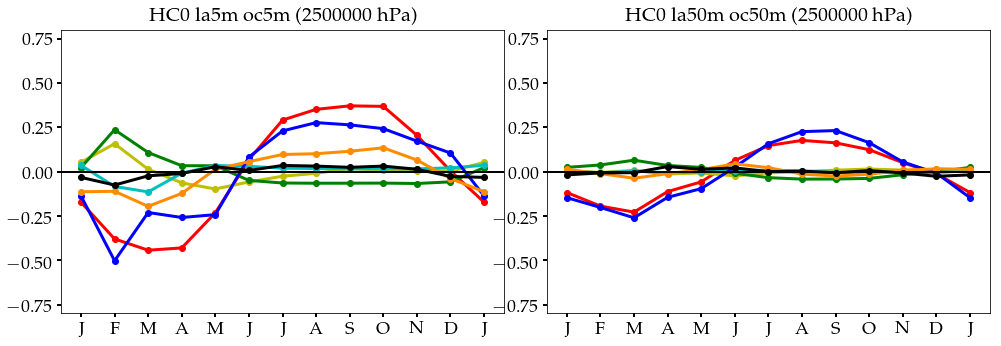

In [39]:
P=8
py.figure(figsize=(14,9))
py.subplot(2,2,1)
plot_together_V_delta(E=0, P=P, show=0)

py.subplot(2,2,2)
plot_together_V_delta(E=1, P=P, show=0)

# py.subplot(2,2,4)
# plot_together_V_delta(E=2, P=P, show=1)
# py.legend(loc='best',bbox_to_anchor=(1.1, 1.5), fontsize=20)

# py.subplot(2,2,3)
# plot_together_V_delta(E=3, P=P, show=0)


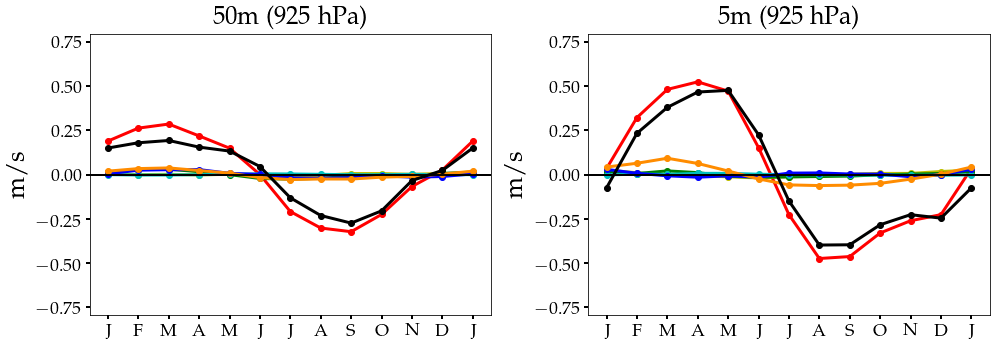

In [40]:
P=-4
py.figure(figsize=(14,9))
py.subplot(2,2,2)
plot_together_V_delta(E=0, P=P, show=0)
py.ylabel('m/s',fontsize=25)
py.title('5m (925 hPa)',fontsize=25 )
#py.legend(loc='best',bbox_to_anchor=(1.1,1.05),fontsize=20, ncol=2)
    
py.subplot(2,2,1)
plot_together_V_delta(E=1, P=P, show=0)
py.ylabel('m/s', fontsize=25)
py.title('50m (925 hPa)', fontsize=25)

py.tight_layout()
# py.savefig('Sep8_Figures/v+925_at_storm.pdf',bbox_to_inches='tight')

# py.subplot(2,2,4)
# plot_together_V_delta(E=2, P=P, show=1)
# py.legend(loc='best',bbox_to_anchor=(1.1, 1.5), fontsize=20)

# py.subplot(2,2,3)
# plot_together_V_delta(E=3, P=P, show=0)


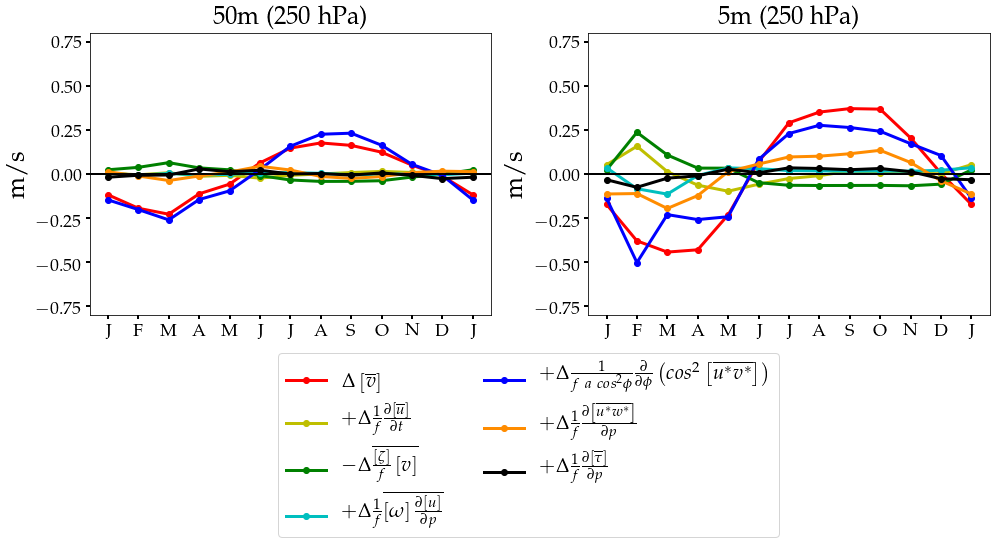

In [41]:
P=8
py.figure(figsize=(14,9))
py.subplot(2,2,2)
plot_together_V_delta(E=0, P=P, show=0)
py.ylabel('m/s',fontsize=25)
py.title('5m (250 hPa)',fontsize=25 )
py.legend(loc='best',bbox_to_anchor=(0.5,-0.1), fontsize=20, ncol=2)
    
py.subplot(2,2,1)
plot_together_V_delta(E=1, P=P, show=0)
py.ylabel('m/s', fontsize=25)
py.title('50m (250 hPa)', fontsize=25)

py.tight_layout()
# py.savefig('Sep8_Figures/v+250_at_storm.pdf',bbox_to_inches='tight')

# py.subplot(2,2,4)
# plot_together_V_delta(E=2, P=P, show=1)
# py.legend(loc='best',bbox_to_anchor=(1.1, 1.5), fontsize=20)

# py.subplot(2,2,3)
# plot_together_V_delta(E=3, P=P, show=0)


In [17]:
P_v_dudt      = at_storm(v_dudt)
P_v_bar       = at_storm(v_bar)
P_v_zetaV     = at_storm(v_zetaV)
P_v_wdudp     = at_storm(v_wdudp)

P_v_divEMF     = at_storm(v_divEMF)
P_v_du_wdp     = at_storm(v_du_wdp)
P_v_stress     = at_storm(v_stress)

In [64]:
def plot_contours_v_decomposed(expi=0, p= 8, max=8, depth='5m'):
    ind=((lat_a>=30) & (lat_a<=80))
    MONTHS = lhs_term1.shape[-1]
    fs =20
    py.figure(figsize=(15,15))
    ranges = np.arange(-max,max+0.2,0.2)
    py.subplot(4,3,1)
    py.contourf(range(MONTHS), lat_a[ind], v_bar[expi, ind, p, :], ranges, cmap=cm.RdBu_r); py.colorbar()
    py.plot(range(MONTHS), storm_pos[expi,:], 'ro-')
    py.title(v_titles[0], fontsize=fs)
    py.subplot(4,3,2)
    py.contourf(range(MONTHS), lat_a[ind], v_dudt[expi, ind, p, :], ranges, cmap=cm.RdBu_r); py.colorbar()
    py.plot(range(MONTHS), storm_pos[expi,:], 'ro-')
    py.title(v_titles[1], fontsize=fs)
    py.subplot(4,3,3)
    py.contourf(range(MONTHS), lat_a[ind], v_zetaV[expi, ind, p, :], ranges, cmap=cm.RdBu_r); py.colorbar()
    py.plot(range(MONTHS), storm_pos[expi,:], 'ro-')
    py.title(v_titles[2], fontsize=fs)
    py.subplot(4,3,4)
    py.contourf(range(MONTHS), lat_a[ind], v_wdudp[expi, ind, p, :], ranges, cmap=cm.RdBu_r); py.colorbar()
    py.plot(range(MONTHS), storm_pos[expi,:], 'ro-')
    py.title(titles[3], fontsize=fs)

    py.subplot(4,3,5)
    py.contourf(range(MONTHS), lat_a[ind], v_divEMF[expi, ind, p, :], ranges, cmap=cm.RdBu_r); py.colorbar()
    py.plot(range(MONTHS), storm_pos[expi,:], 'ro-')
    py.title(v_titles[4], fontsize=fs)
    py.subplot(4,3,6)
    py.contourf(range(MONTHS), lat_a[ind], v_du_wdp[expi, ind, p, :], ranges, cmap=cm.RdBu_r); py.colorbar()
    py.plot(range(MONTHS), storm_pos[expi,:], 'ro-')
    py.title(v_titles[5], fontsize=fs)
    py.subplot(4,3,7)
    py.contourf(range(MONTHS), lat_a[ind], v_stress[expi, ind, p, :], ranges, cmap=cm.RdBu_r); py.colorbar()
    py.plot(range(MONTHS), storm_pos[expi,:], 'ro-')
    py.title(v_titles[6], fontsize=fs)
    py.suptitle(depth+' --- Decomposition of V [m/s] at '+str(int(pres[p]*100))+' hPa', fontsize=fs, y=1.01)
    py.tight_layout()

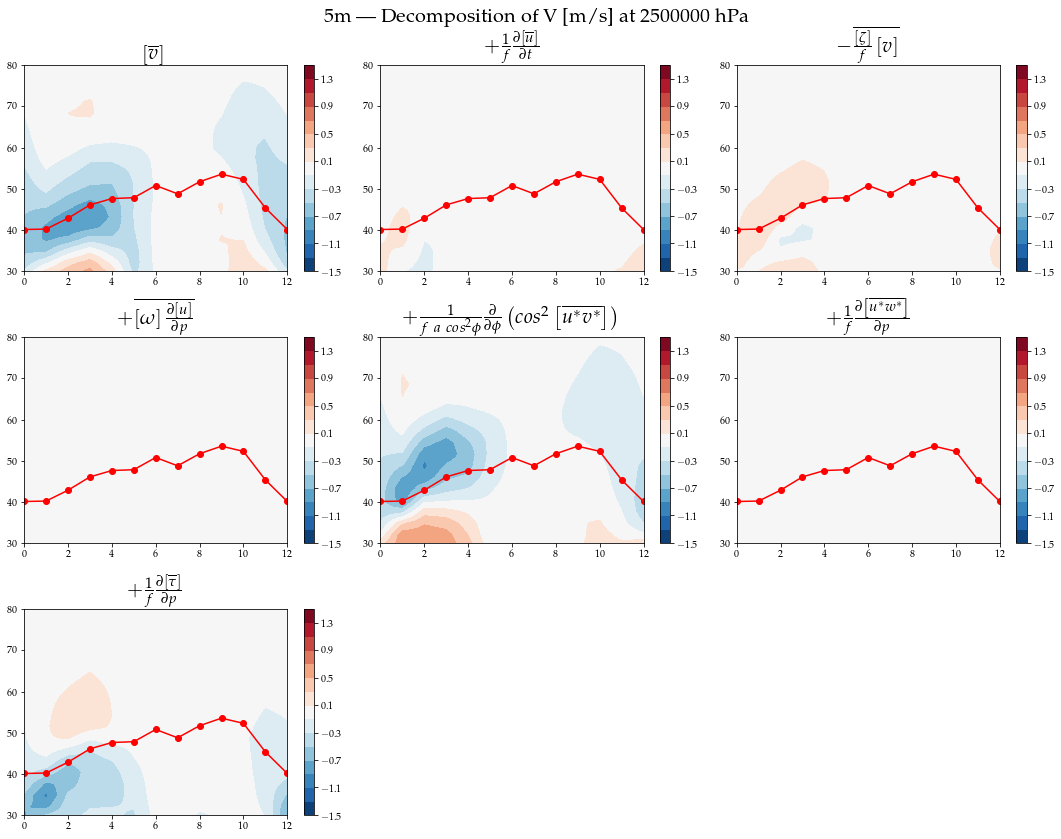

In [65]:
plot_contours_v_decomposed(expi=0, p= 8, max=1.5, depth='5m')

In [67]:
# plot_contours_v_decomposed(expi=3, p= -4, max=1.5, depth='50m tropics, 5m extratropics')

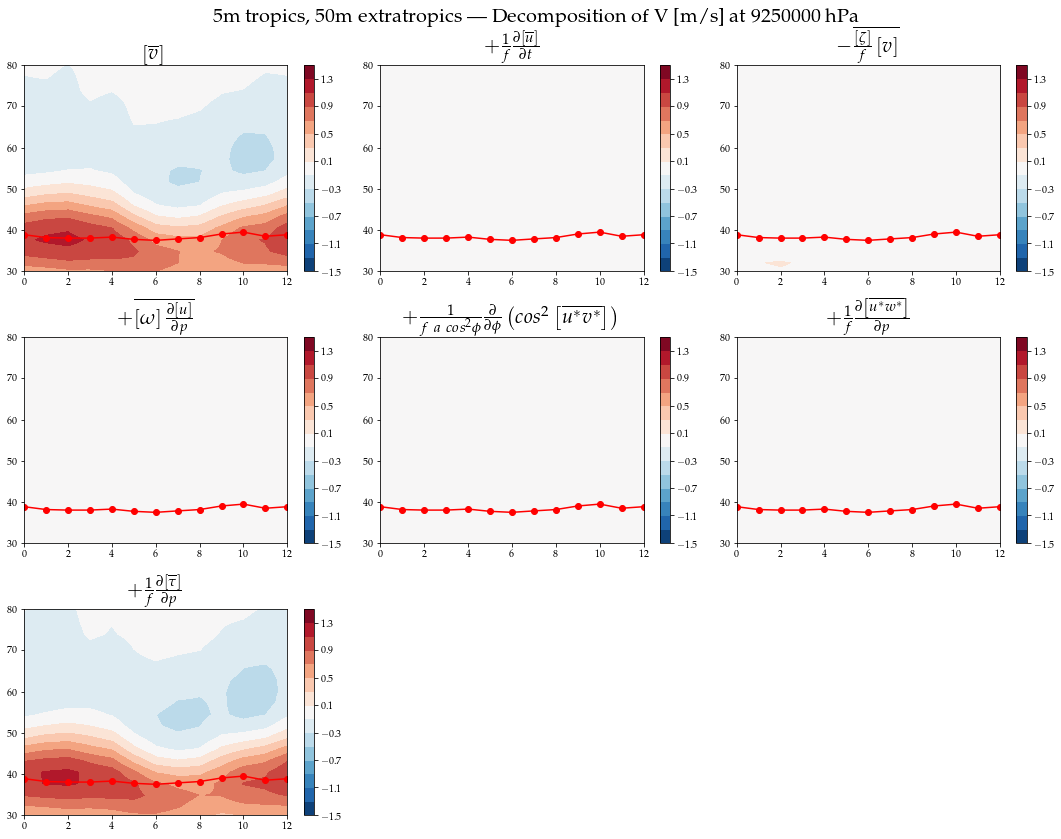

In [69]:
plot_contours_v_decomposed(expi=1, p= -4, max=1.5, depth='5m tropics, 50m extratropics')

In [22]:
len(v_titles)

7

In [70]:
def plot_contours_v_LHS_RHS(expi=0, p= 8, max=8, depth='5m'):
    ind=((lat_a>=30) & (lat_a<=80))
    MONTHS = lhs_term1.shape[-1]
    fs =20
    py.figure(figsize=(18,6))
    ranges = np.arange(-max,max+0.15,0.15)
    py.subplot(1,3,1)
    py.contourf(range(MONTHS), lat_a[ind], v_bar[expi, ind, p, :], ranges, cmap=cm.RdBu_r); #py.colorbar()
    c=py.contour(range(MONTHS), lat_a[ind], v_bar[expi, ind, p, :], ranges, colors='k')
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=20, fontsize=20)
    py.plot(range(MONTHS), storm_pos[expi,:], 'ro-')
    py.title(v_titles[0], fontsize=fs)
    py.tick_params(labelsize=18,size=4,width=2)
    
    py.subplot(1,3,2)
    
    RHS =  v_dudt+v_zetaV+v_wdudp+v_divEMF+v_du_wdp #+ v_stress
    
    py.contourf(range(MONTHS), lat_a[ind], RHS[expi, ind, p, :], ranges, cmap=cm.RdBu_r); #py.colorbar()
    c=py.contour(range(MONTHS), lat_a[ind], RHS[expi, ind, p, :], ranges, colors='k')
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=20, fontsize=20)
    py.plot(range(MONTHS), storm_pos[expi,:], 'ro-')
    py.title(v_titles[1]+v_titles[2]+v_titles[3]+'\n'+v_titles[4]+v_titles[5], fontsize=fs)
    py.tick_params(labelsize=18,size=4,width=2)
    
    py.subplot(1,3,3)
    
    RHS =  v_dudt+v_zetaV+v_wdudp+v_divEMF+v_du_wdp #+ v_stress
    
    py.contourf(range(MONTHS), lat_a[ind], (v_bar-RHS)[expi, ind, p, :], ranges, cmap=cm.RdBu_r);# py.colorbar()
    c= py.contour(range(MONTHS), lat_a[ind], (v_bar-RHS)[expi, ind, p, :], ranges, colors='k')
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=20, fontsize=20)
    py.plot(range(MONTHS), storm_pos[expi,:], 'ro-')
    py.title('residual='+v_titles[0]+'- RHS', fontsize=fs)

    py.tick_params(labelsize=18,size=4,width=2)
    py.suptitle(depth+' --- Decomposition of V [m/s] at '+str(int(pres[p]*100))+' hPa', fontsize=fs, y=1.05)
    py.tight_layout()
    
def plot_v_LHS_equal_RHS(expi=0, p= 8):
    fs =20
    py.figure(figsize=(8,4))
    py.plot(lat_a, (lhs_term1+lhs_term2+lhs_term4+lhs_term3)[expi, :, p, :-1].mean(axis=-1)*10**5, \
            label=titles[0]+titles[1]+titles[2]+titles[3], lw=3); 
    py.plot(lat_a, (rhs_term1+rhs_term2+stress_term)[expi, :, p, :-1].mean(axis=-1)*10**5, \
            label=titles[4]+titles[5]+titles[6], lw=3, ls='--'); 
    py.axhline(0, color='k')
    py.title(exp_names[expi]+'  ('+str(int(pres[p]*100))+' hPa)', fontsize=fs, y=1.01)
    py.legend(loc='best',bbox_to_anchor=(1, 1.05), fontsize=20)
    py.tight_layout()

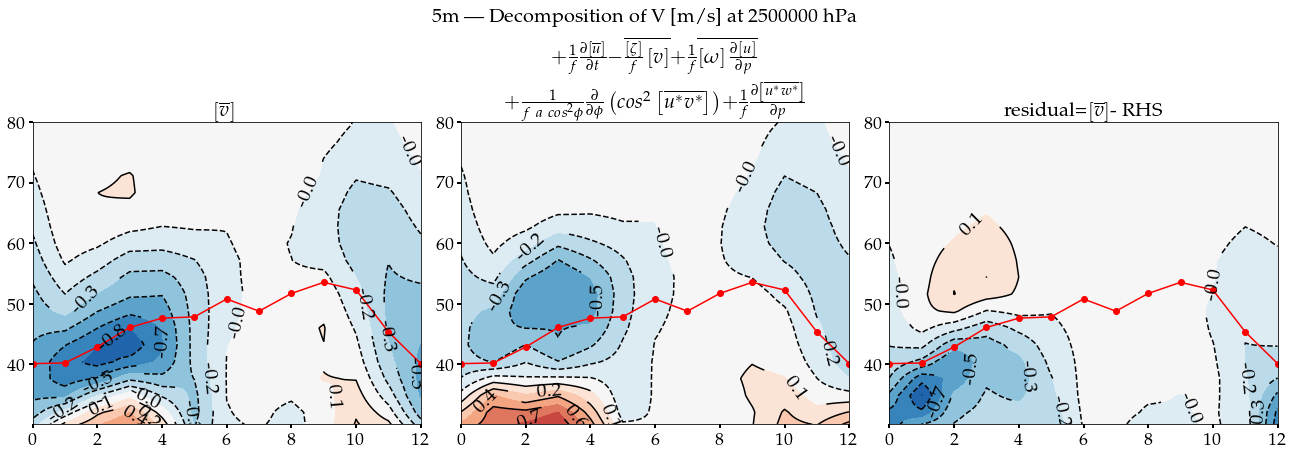

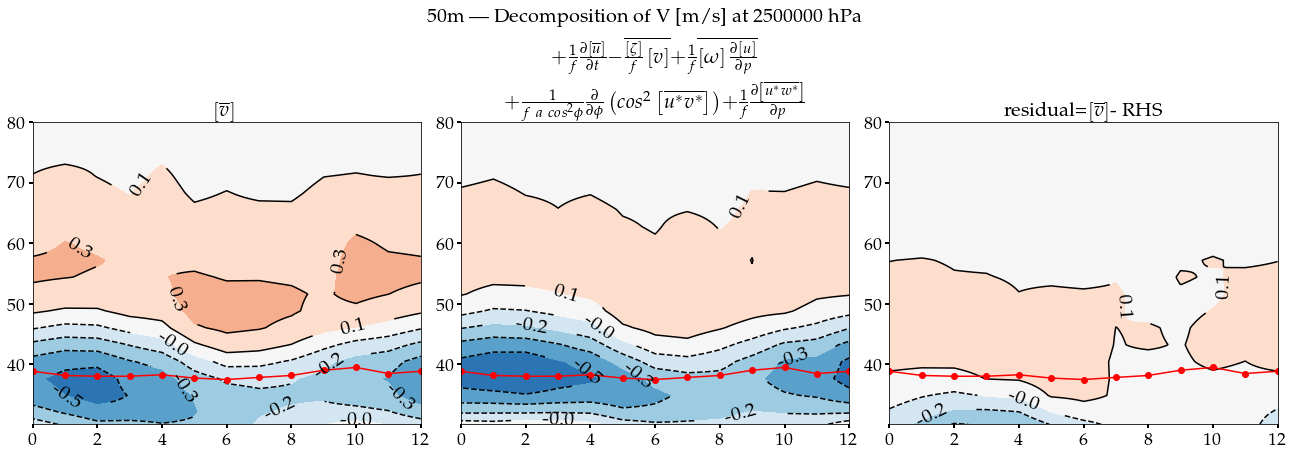

In [71]:
plot_contours_v_LHS_RHS(expi=0, p= 8, max=1.1, depth='5m')

plot_contours_v_LHS_RHS(expi=1, p= 8, max=0.8, depth='50m')

In [72]:
v_titles[0]

'$\\left[\\overline{v}\\right]$'

In [74]:
def plot_contours_v_mean_eddy(expi=0, p= 8, max=8, depth='5m'):
    ind=((lat_a>=30) & (lat_a<=80))
    MONTHS = lhs_term1.shape[-1]
    fs =25
    fs1=22
    py.figure(figsize=(15,10))
    ranges = np.arange(-max,max+0.15,0.15)
    py.subplot(2,2,1)
    py.contourf(range(MONTHS), lat_a[ind], v_bar[expi, ind, p, :], ranges, cmap=cm.RdBu_r); #py.colorbar()
    c=py.contour(range(MONTHS), lat_a[ind], v_bar[expi, ind, p, :], ranges, colors='k')
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=20, fontsize=20)
    py.plot(range(MONTHS), storm_pos[expi,:], 'ro-')
    py.title(v_titles[0], fontsize=fs, y=1.02)
    py.tick_params(labelsize=18,size=4,width=2)
    mticks2 = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    py.xticks(range(13), (mticks2),fontsize=18)
    py.ylabel('Latitude', fontsize=fs1)
    
    py.subplot(2,2,2)
    
    mean =  v_dudt+v_zetaV+v_wdudp
    
    py.contourf(range(MONTHS), lat_a[ind], mean[expi, ind, p, :], ranges, cmap=cm.RdBu_r); #py.colorbar()
    c=py.contour(range(MONTHS), lat_a[ind], mean[expi, ind, p, :], ranges, colors='k')
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=20, fontsize=20)
    py.plot(range(MONTHS), storm_pos[expi,:], 'ro-')
#     py.title(v_titles[1]+v_titles[2]+v_titles[3], fontsize=fs)
    py.title(r'$\left[\overline{v_{mean}}\right]$', fontsize=fs, y=1.02)
    py.tick_params(labelsize=18,size=4,width=2)
    mticks2 = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    py.xticks(range(13), (mticks2),fontsize=18)
    py.ylabel('Latitude', fontsize=fs1)
    
    
    py.subplot(2,2,3)
    
    eddy =  v_divEMF+v_du_wdp #+ v_stress
    
    py.contourf(range(MONTHS), lat_a[ind],  eddy[expi, ind, p, :], ranges, cmap=cm.RdBu_r); #py.colorbar()
    c=py.contour(range(MONTHS), lat_a[ind], eddy[expi, ind, p, :], ranges, colors='k')
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=20, fontsize=20)
    py.plot(range(MONTHS), storm_pos[expi,:], 'ro-')
#     py.title(v_titles[4]+v_titles[5], fontsize=fs)
    py.title(r'$\left[\overline{v_{eddy}}\right]$', fontsize=fs, y=1.02)
    py.tick_params(labelsize=18,size=4,width=2)
    mticks2 = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    py.xticks(range(13), (mticks2),fontsize=18)
    py.ylabel('Latitude', fontsize=fs1)

    
    py.subplot(2,2,4)
    
    RHS =  v_dudt+v_zetaV+v_wdudp+v_divEMF+v_du_wdp #+ v_stress
    
    py.contourf(range(MONTHS), lat_a[ind], (v_bar-(mean+eddy))[expi, ind, p, :], ranges, cmap=cm.RdBu_r);# py.colorbar()
    c= py.contour(range(MONTHS), lat_a[ind], (v_bar-(mean+eddy))[expi, ind, p, :], ranges, colors='k')
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=20, fontsize=20)
    py.plot(range(MONTHS), storm_pos[expi,:], 'ro-')
#     py.title('residual='+v_titles[0]+r'- ($v_{mean}$+$v_{eddy}$)', fontsize=fs)
    py.title('residual', fontsize=fs, y=1.02)
    mticks2 = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    py.xticks(range(13), (mticks2),fontsize=18)
    py.ylabel('Latitude', fontsize=fs1)

    py.tick_params(labelsize=18,size=4,width=2)
    py.suptitle(str(int(pres[p]*100))+' hPa', fontsize=fs, y=1.05)
    py.tight_layout()
    

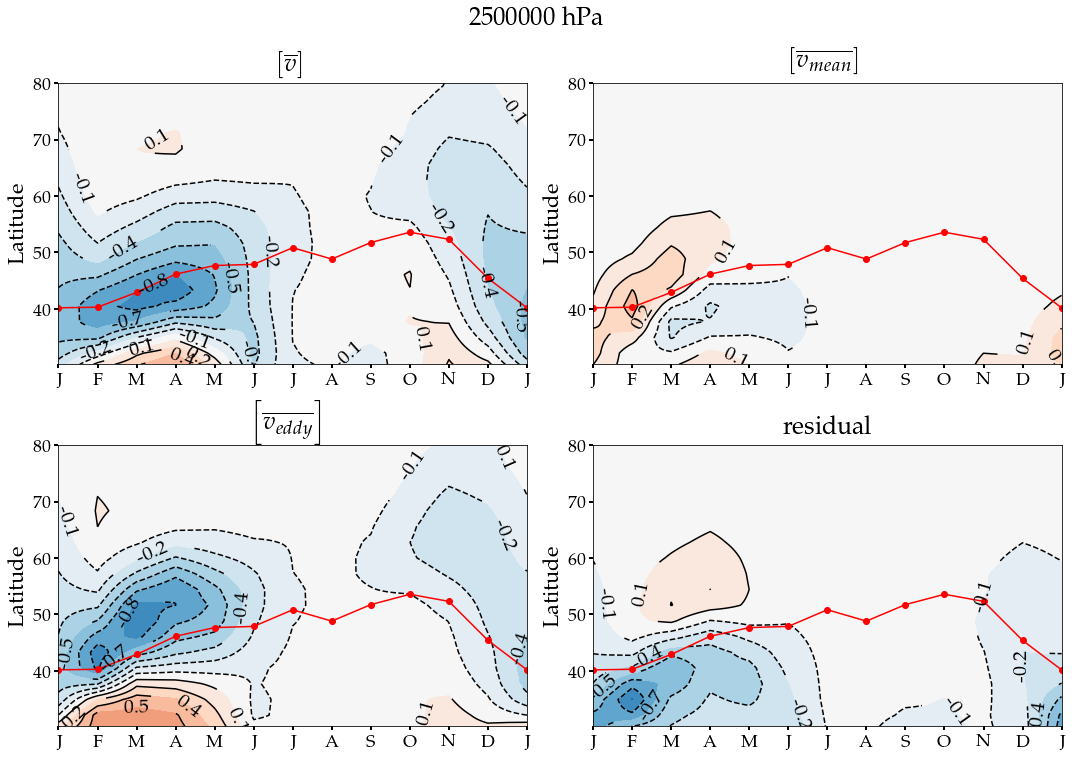

In [75]:
plot_contours_v_mean_eddy(expi=0, p= 8, max=1.4, depth='5m')
# py.savefig('Sep8_Figures/5m.pdf')

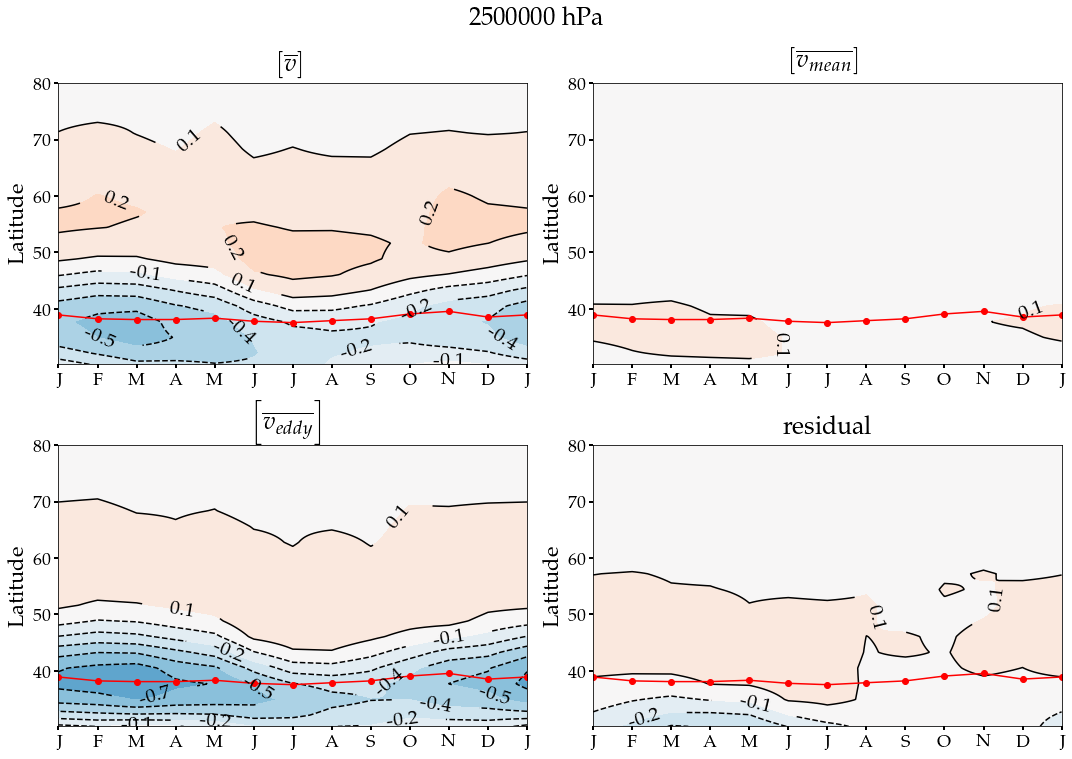

In [76]:
plot_contours_v_mean_eddy(expi=1, p= 8, max=1.4, depth='50m')
# py.savefig('Sep8_Figures/50m.pdf')

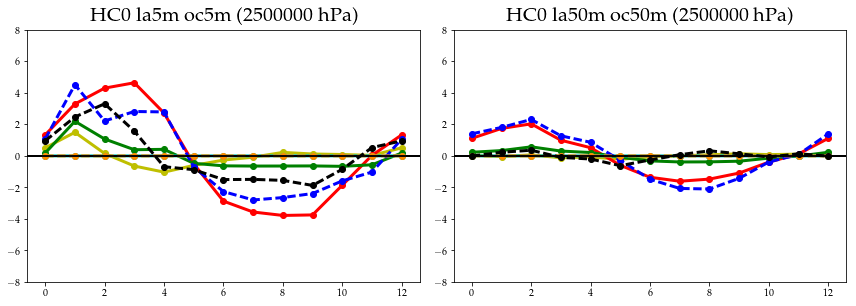

In [77]:
P=8
py.figure(figsize=(12,8))
py.subplot(2,2,1)
plot_together(E=0, P=P, show=0)

py.subplot(2,2,2)
plot_together(E=1, P=P, show=0)

# py.subplot(2,2,4)
# plot_together(E=2, P=P, show=1)
# py.legend(loc='best',bbox_to_anchor=(1.1, 1.5), fontsize=20)

# py.subplot(2,2,3)
# plot_together(E=3, P=P, show=0)


In [78]:
# P=-4
# py.figure(figsize=(12,8))
# py.subplot(2,2,1)
# plot_together(E=0, P=P, show=0)

# py.subplot(2,2,2)
# plot_together(E=1, P=P, show=0)

# py.subplot(2,2,4)
# plot_together(E=2, P=P, show=1)
# py.legend(loc='best',bbox_to_anchor=(1.1, 1.5), fontsize=20)

# py.subplot(2,2,3)
# plot_together(E=3, P=P, show=0)


In [79]:
def plot_LHS_equal_RHS(expi=0, p= 8):
    fs =20
    py.figure(figsize=(8,4))
    py.plot(lat_a, (lhs_term1+lhs_term2+lhs_term4+lhs_term3)[expi, :, p, :-1].mean(axis=-1)*10**5, \
            label=titles[0]+titles[1]+titles[2]+titles[3], lw=3); 
    py.plot(lat_a, (rhs_term1+rhs_term2+stress_term)[expi, :, p, :-1].mean(axis=-1)*10**5, \
            label=titles[4]+titles[5]+titles[6], lw=3, ls='--'); 
    py.axhline(0, color='k')
    py.title(exp_names[expi]+'  ('+str(int(pres[p]*100))+' hPa)', fontsize=fs, y=1.01)
    py.legend(loc='best',bbox_to_anchor=(1, 1.05), fontsize=20)
    py.tight_layout()

In [80]:
# p=-1
# py.plot(lat_a, rhs_term3a[0, :, p, :-1].mean(axis=-1)*10**5, label='residual', lw=3, c='r')
# py.plot(lat_a, rhs_term3[0, :, p, :-1].mean(axis=-1)*10**5, label='residual', lw=3, c='b')
# py.plot(lat_a, rhs_term3b[0, :, p, :-1].mean(axis=-1)*10**5, label='residual', lw=3, c='g')
# py.plot(lat_a, rhs_term3c[0, :, p, :-1].mean(axis=-1)*10**5, label='residual', lw=3, c='y')

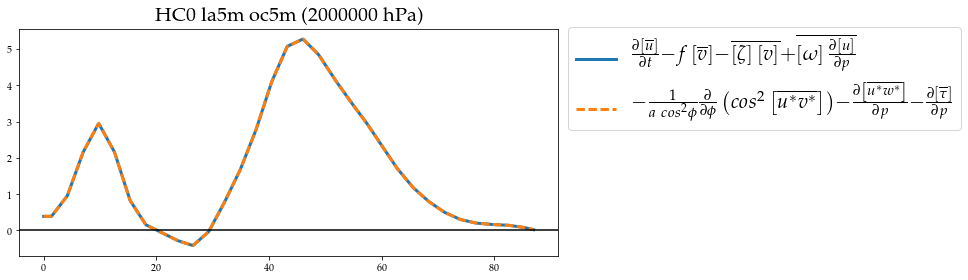

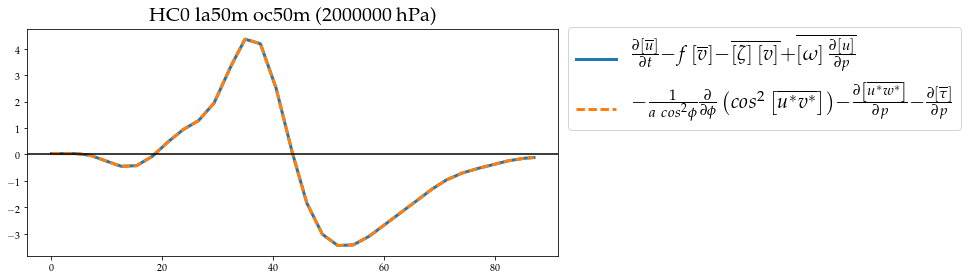

In [83]:
P=7
plot_LHS_equal_RHS(expi=0, p= P)
plot_LHS_equal_RHS(expi=1, p= P)
# plot_LHS_equal_RHS(expi=2, p= P)
# plot_LHS_equal_RHS(expi=3, p= P)

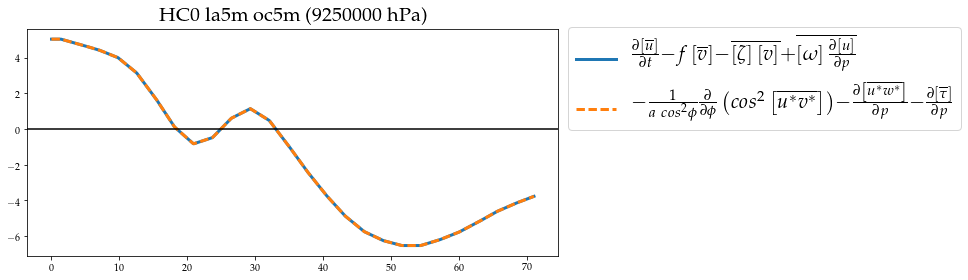

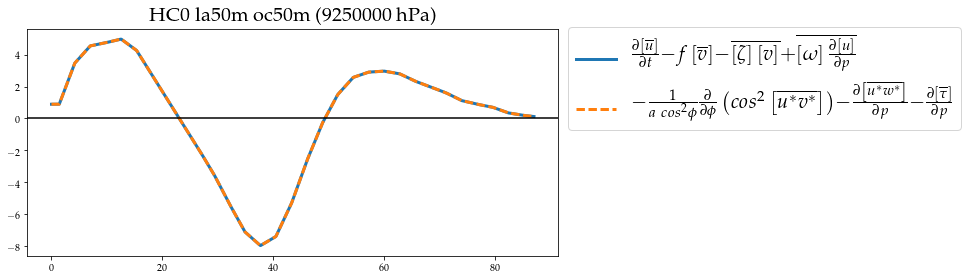

In [84]:
P=-4
plot_LHS_equal_RHS(expi=0, p= P)
plot_LHS_equal_RHS(expi=1, p= P)
# plot_LHS_equal_RHS(expi=2, p= P)
# plot_LHS_equal_RHS(expi=3, p= P)

In [85]:
def plot_annual_mean(expi=0, p= 8):
    fs =20
    py.figure(figsize=(8,4))
    py.plot(lat_a, lhs_term1[expi, :, p, :-1].mean(axis=-1)*10**5, label=titles[0], lw=3); 
    py.plot(lat_a, lhs_term2[expi, :, p, :-1].mean(axis=-1)*10**5, label=titles[1], lw=3); 
    py.plot(lat_a, lhs_term3[expi, :, p, :-1].mean(axis=-1)*10**5, label=titles[2], lw=3);    
    py.plot(lat_a, lhs_term4[expi, :, p, :-1].mean(axis=-1)*10**5, label=titles[3], lw=3);    

    py.plot(lat_a, rhs_term1[expi, :, p, :-1].mean(axis=-1)*10**5, label=titles[4], lw=3, ls='--'); 
    py.plot(lat_a, rhs_term2[expi, :, p, :-1].mean(axis=-1)*10**5, label=titles[5], lw=3, ls='--');
    py.plot(lat_a, stress_term[expi, :, p, :-1].mean(axis=-1)*10**5, label=titles[6], lw=3, ls='--');
    
#     py.plot(lat_a, residual[expi, :, p, :-1].mean(axis=-1)*10**5, label='residual', lw=3, c='k');
    py.title(exp_names[expi]+'  ('+str(int(pres[p]*100))+' hPa)', fontsize=fs, y=1.01)
    py.legend(loc='best',bbox_to_anchor=(1, 1.05), fontsize=20)
    py.axhline(0, color='k')
    py.tight_layout()

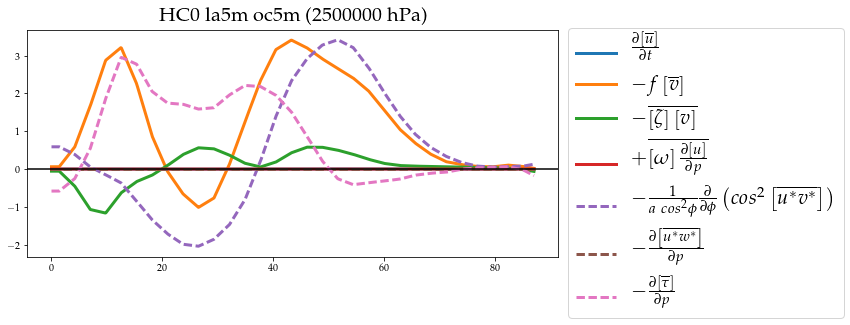

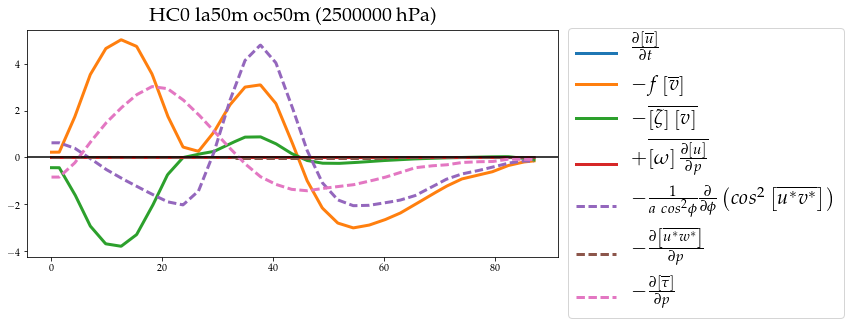

In [86]:
P=8
plot_annual_mean(expi=0, p= P)
plot_annual_mean(expi=1, p= P)
# plot_annual_mean(expi=2, p= P)
# plot_annual_mean(expi=3, p= P)

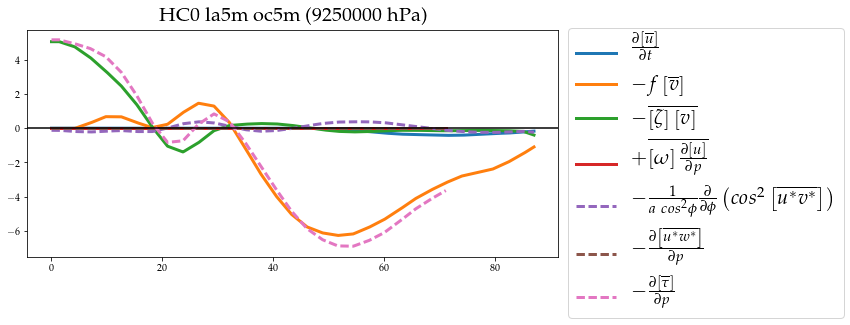

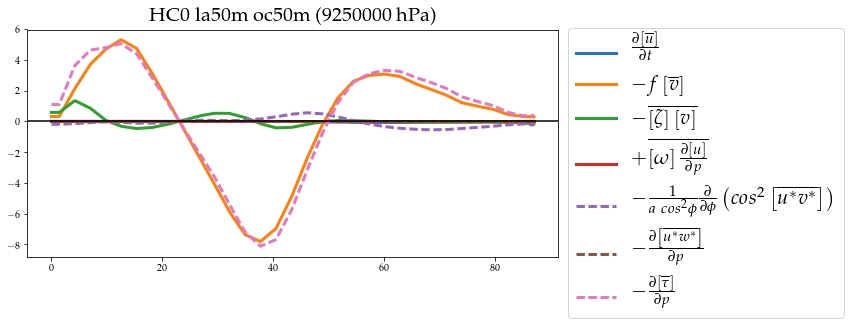

In [87]:
P=-4
plot_annual_mean(expi=0, p= P)
plot_annual_mean(expi=1, p= P)
# plot_annual_mean(expi=2, p= P)
# plot_annual_mean(expi=3, p= P)

In [88]:
def plot_each_month(expi=0, p= 8, m=0):
    fs =20
    py.figure(figsize=(8,4))
    py.plot(lat_a, lhs_term1[expi, :, p, m]*10**5, label=titles[0], lw=3); 
    py.plot(lat_a, lhs_term2[expi, :, p, m]*10**5, label=titles[1], lw=3); 
    py.plot(lat_a, lhs_term3[expi, :, p, m]*10**5, label=titles[2], lw=3);    
    py.plot(lat_a, lhs_term4[expi, :, p, m]*10**5, label=titles[3], lw=3);    

    py.plot(lat_a, rhs_term1[expi, :, p, m]*10**5, label=titles[4], lw=3, ls='--'); 
    py.plot(lat_a, rhs_term2[expi, :, p, m]*10**5, label=titles[5], lw=3, ls='--');
    
    py.plot(lat_a, stress_term[expi, :, p, m]*10**5, label=titles[6], lw=3, ls='--');
    py.title(exp_names[expi]+'  ('+str(int(pres[p]*100))+' hPa)', fontsize=fs, y=1.01)
    py.legend(loc='best',bbox_to_anchor=(1, 1.05), fontsize=20)
    py.axhline(0, color='k')
    py.tight_layout()
    

In [89]:
# P=-4; M=0
# plot_each_month(expi=0, p= P, m=M)
# plot_each_month(expi=1, p= P, m=M)
# plot_each_month(expi=2, p= P, m=M)
# plot_each_month(expi=3, p= P, m=M)

In [90]:
# def plot_annual_mean1(expi=0, p= 8):
#     fs =20
#     py.figure(figsize=(8,4))
#     py.plot(lat_a, lhs_term3[expi, :, p, :-1].mean(axis=-1)*10**5,  label=titles[2], lw=3); 
#     py.plot(lat_a, lhs_term3a[expi, :, p, :-1].mean(axis=-1)*10**5, label='eddy',    lw=3); 
#     py.plot(lat_a, lhs_term3b[expi, :, p, :-1].mean(axis=-1)*10**5, label='mean',     lw=3);     
#     py.title(exp_names[expi]+'  ('+str(int(pres[p]*100))+' hPa)', fontsize=fs, y=1.01)
#     py.legend(loc='best',bbox_to_anchor=(1, 1.05), fontsize=20)
#     py.tight_layout()
    
# plot_annual_mean1(expi=0, p= 8)
# plot_annual_mean1(expi=1, p= 8)
# plot_annual_mean1(expi=2, p= 8)
# plot_annual_mean1(expi=3, p= 8)

In [91]:
print lhs_term1.shape
print pres*100

(2, 871, 27, 13)
[5.00e+03 1.00e+05 3.00e+05 5.00e+05 7.00e+05 1.00e+06 1.50e+06 2.00e+06
 2.50e+06 3.00e+06 3.50e+06 4.00e+06 4.50e+06 5.00e+06 5.50e+06 6.00e+06
 6.50e+06 7.00e+06 7.50e+06 8.00e+06 8.25e+06 8.50e+06 9.00e+06 9.25e+06
 9.50e+06 9.75e+06 1.00e+07]


In [92]:
months= ['J','F','M','A','J','J','A','S','O','N','D','J']

In [93]:
def plot_contours_vertical(expi=0, m= 0, max=8):
    fs =20
    py.figure(figsize=(15,15))
    ranges = np.arange(-max,max+2,2)
    py.subplot(4,3,1)
    py.contourf(lat_a, pres[1:]*100, (lhs_term1[expi, :, 1:, m]*10**5).T, ranges, cmap=cm.RdBu_r); py.colorbar()
    py.gca().invert_yaxis()
    py.title(titles[0], fontsize=fs)
    py.subplot(4,3,2)
    py.contourf( lat_a, pres[1:]*100, (lhs_term2[expi, :, 1:, m]*10**5).T, ranges, cmap=cm.RdBu_r); py.colorbar()
    py.gca().invert_yaxis()
    py.title(titles[1], fontsize=fs)
    py.subplot(4,3,3)
    py.contourf( lat_a, pres[1:]*100, (lhs_term3b[expi, :, 1:, m]*10**5).T, ranges, cmap=cm.RdBu_r); py.colorbar()
    py.gca().invert_yaxis()
    py.title(titles[2], fontsize=fs)
    py.subplot(4,3,4)
    py.contourf(lat_a, pres[1:]*100, (lhs_term4b[expi, :, 1:, m]*10**5).T, ranges, cmap=cm.RdBu_r); py.colorbar()
    py.gca().invert_yaxis()
    py.title(titles[3], fontsize=fs)

    py.subplot(4,3,5)
    py.contourf( lat_a, pres[1:]*100, (rhs_term1a[expi, :, 1:, m]*10**5).T, ranges, cmap=cm.RdBu_r); py.colorbar()
    py.gca().invert_yaxis()
    py.title(titles[4], fontsize=fs)
    py.subplot(4,3,6)
    py.contourf(lat_a, pres[1:]*100,  (rhs_term2a[expi, :, 1:, m]*10**5).T, ranges, cmap=cm.RdBu_r); py.colorbar()
    py.gca().invert_yaxis()
    py.title(titles[5], fontsize=fs)
    py.subplot(4,3,7)
    py.contourf(lat_a, pres[1:]*100,  (stress_term[expi, :, 1:, m]*10**5).T, ranges, cmap=cm.RdBu_r); py.colorbar()
    py.gca().invert_yaxis()
    py.title(titles[6], fontsize=fs)

#     py.suptitle((months[m]), fontsize=fs, y=1.01)
    py.tight_layout()

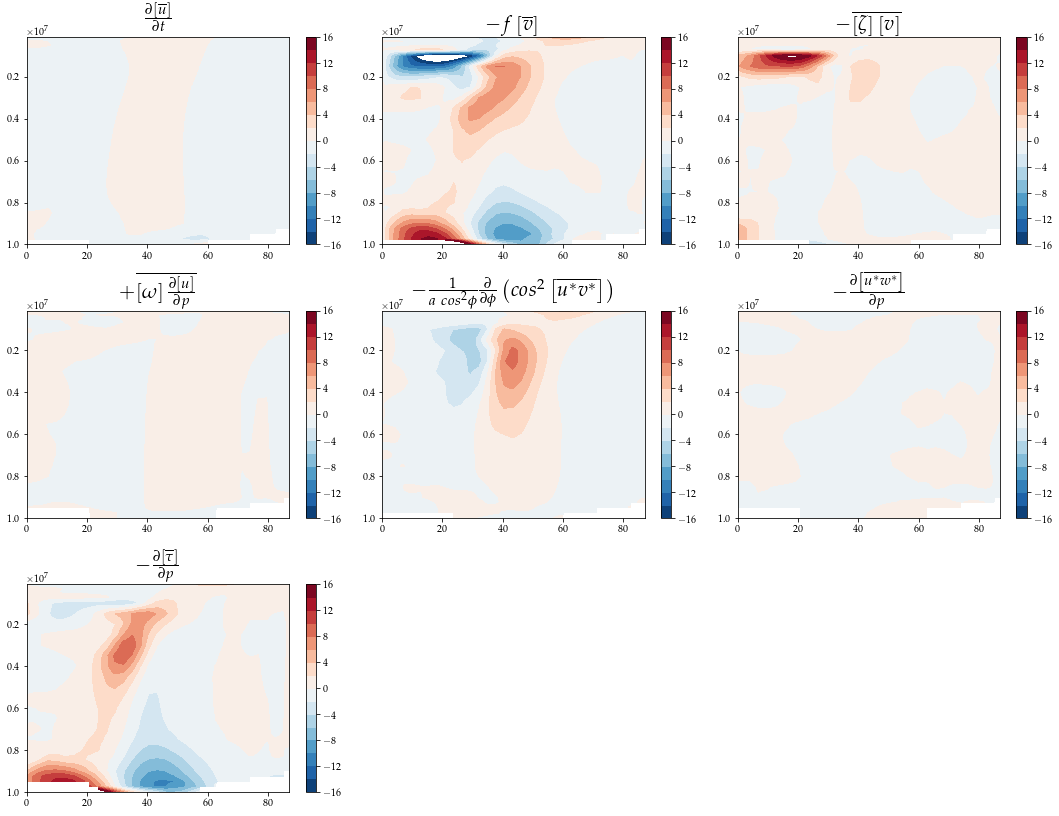

In [94]:
M=1
plot_contours_vertical(expi=0, m= M, max=16)

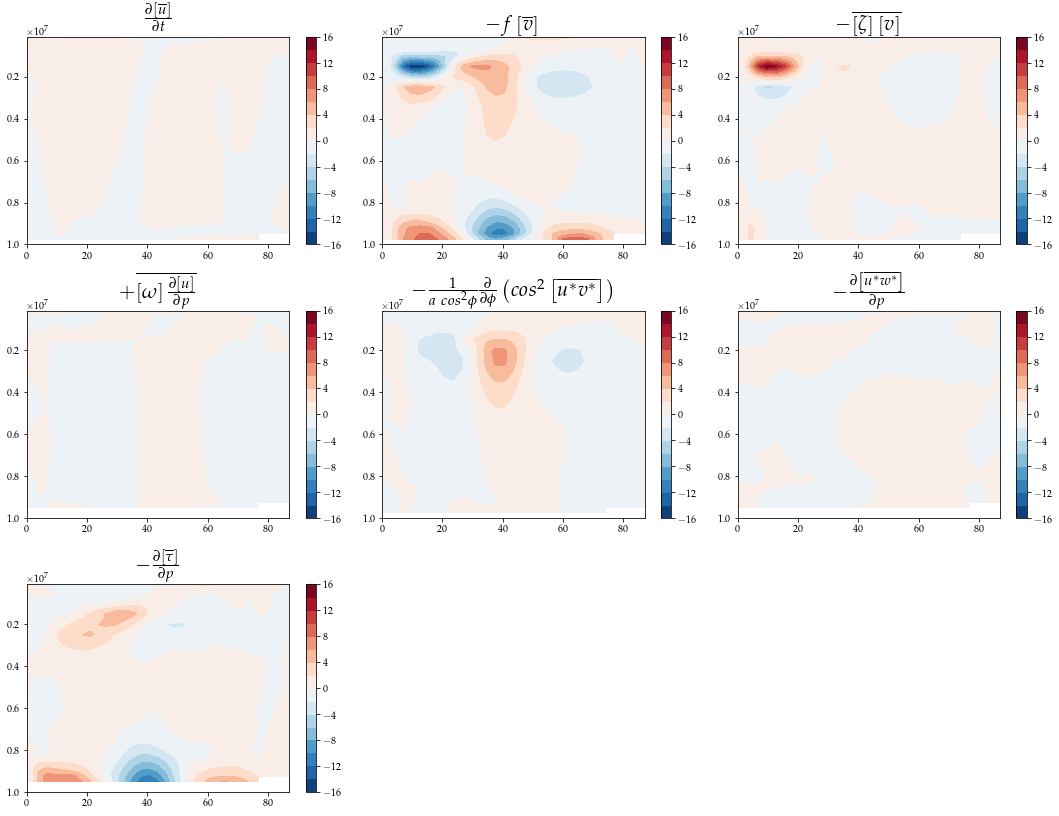

In [95]:
M=1
plot_contours_vertical(expi=1, m= M, max=16)

In [100]:
# M=1
# plot_contours_vertical(expi=2, m= M, max=16)

In [102]:
# M=1
# plot_contours_vertical(expi=3, m= M, max=16)

In [103]:
def plot_contours(expi=0, p= 8, max=8):
    MONTHS = lhs_term1.shape[-1]
    fs =20
    py.figure(figsize=(15,15))
    ranges = np.arange(-max,max+2,2)
    py.subplot(4,3,1)
    py.contourf(range(MONTHS), lat_a, lhs_term1[expi, :, p, :]*10**5, ranges, cmap=cm.RdBu_r); py.colorbar()
    py.title(titles[0], fontsize=fs)
    py.subplot(4,3,2)
    py.contourf(range(MONTHS), lat_a, lhs_term2[expi, :, p, :]*10**5, ranges, cmap=cm.RdBu_r); py.colorbar()
#     py.contour(range(MONTHS), lat_a, (rhs_term1)[expi, :, p, :]*10**5, ranges, colors='k'); #py.colorbar()
    py.title(titles[1], fontsize=fs)
    py.subplot(4,3,3)
    py.contourf(range(MONTHS), lat_a, lhs_term3[expi, :, p, :]*10**5, ranges, cmap=cm.RdBu_r); py.colorbar()
    py.title(titles[2], fontsize=fs)
    py.subplot(4,3,4)
    py.contourf(range(MONTHS), lat_a, lhs_term4[expi, :, p, :]*10**5, ranges, cmap=cm.RdBu_r); py.colorbar()
    py.title(titles[3], fontsize=fs)

    py.subplot(4,3,5)
    py.contourf(range(MONTHS), lat_a, rhs_term1[expi, :, p, :]*10**5, ranges, cmap=cm.RdBu_r); py.colorbar()
    py.title(titles[4], fontsize=fs)
    py.subplot(4,3,6)
    py.contourf(range(MONTHS), lat_a, rhs_term2[expi, :, p, :]*10**5, ranges, cmap=cm.RdBu_r); py.colorbar()
    py.title(titles[5], fontsize=fs)
    py.subplot(4,3,7)
    py.contourf(range(MONTHS), lat_a, stress_term[expi, :, p, :]*10**5, ranges, cmap=cm.RdBu_r); py.colorbar()
    py.title(titles[6], fontsize=fs)
    py.suptitle(str(int(pres[p]*100))+' hPa', fontsize=fs, y=1.01)
    py.tight_layout()

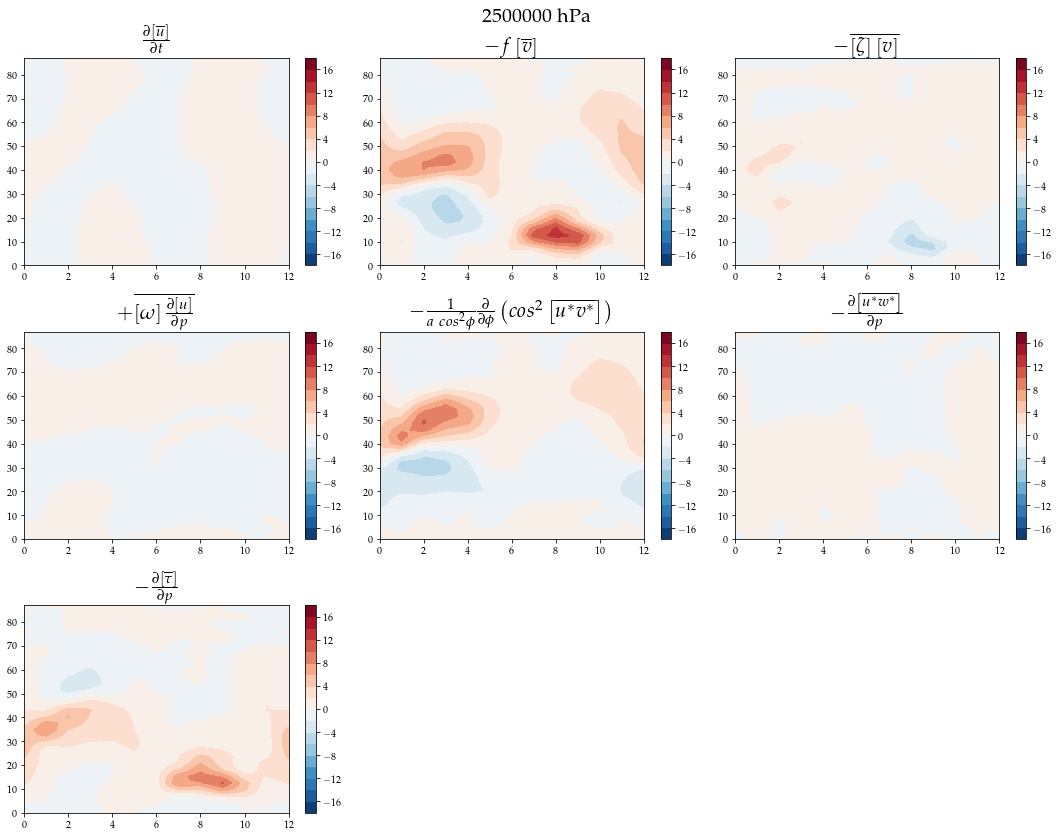

In [104]:
plot_contours(expi=0, p= 8, max=18)

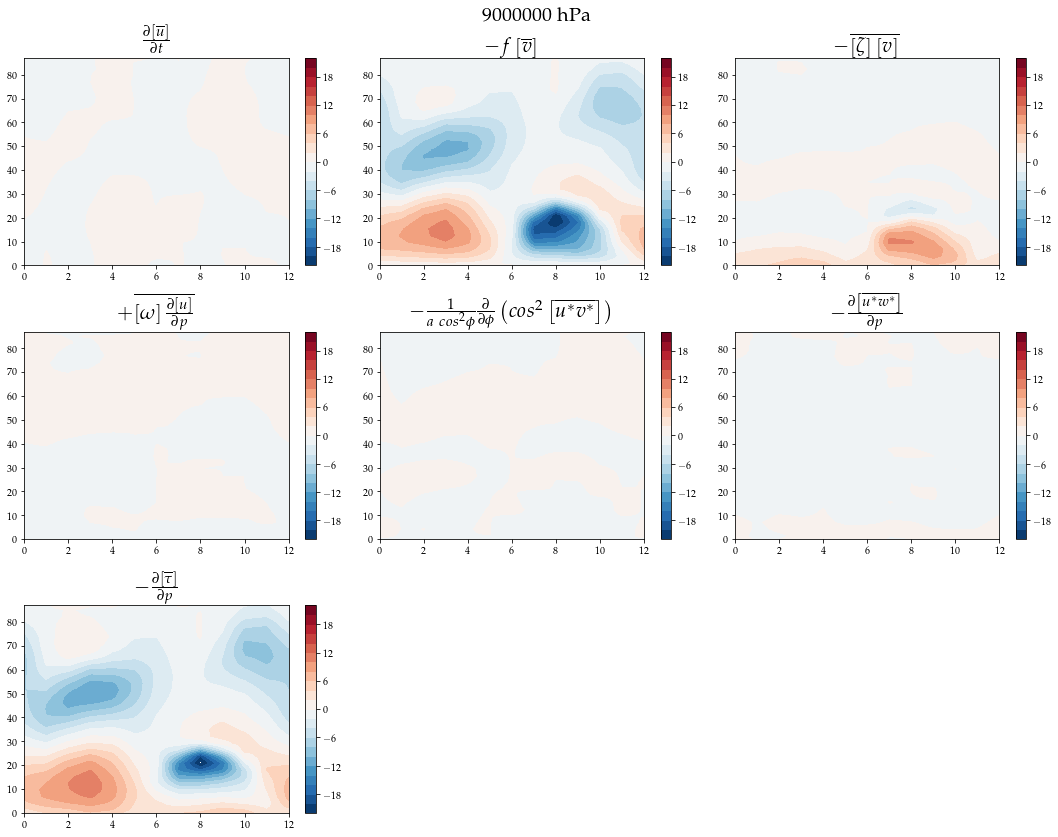

In [105]:
plot_contours(expi=0, p= -5, max=22)

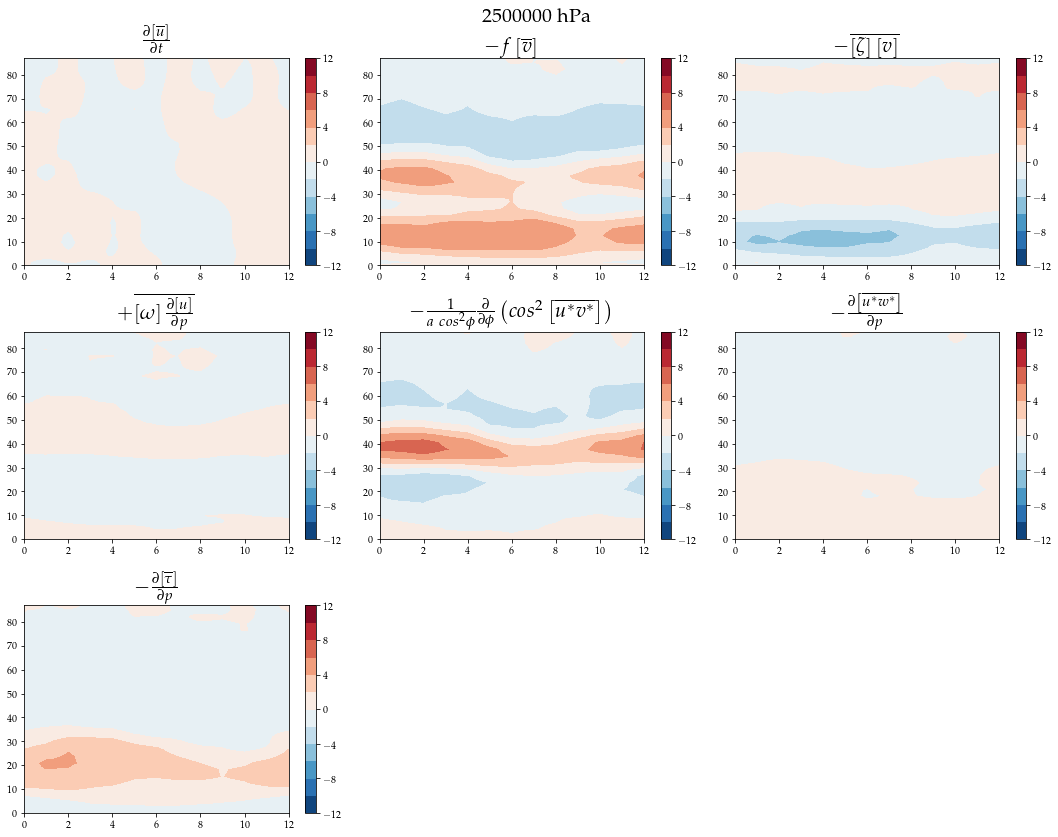

In [106]:
plot_contours(expi=1, p= 8, max=12)

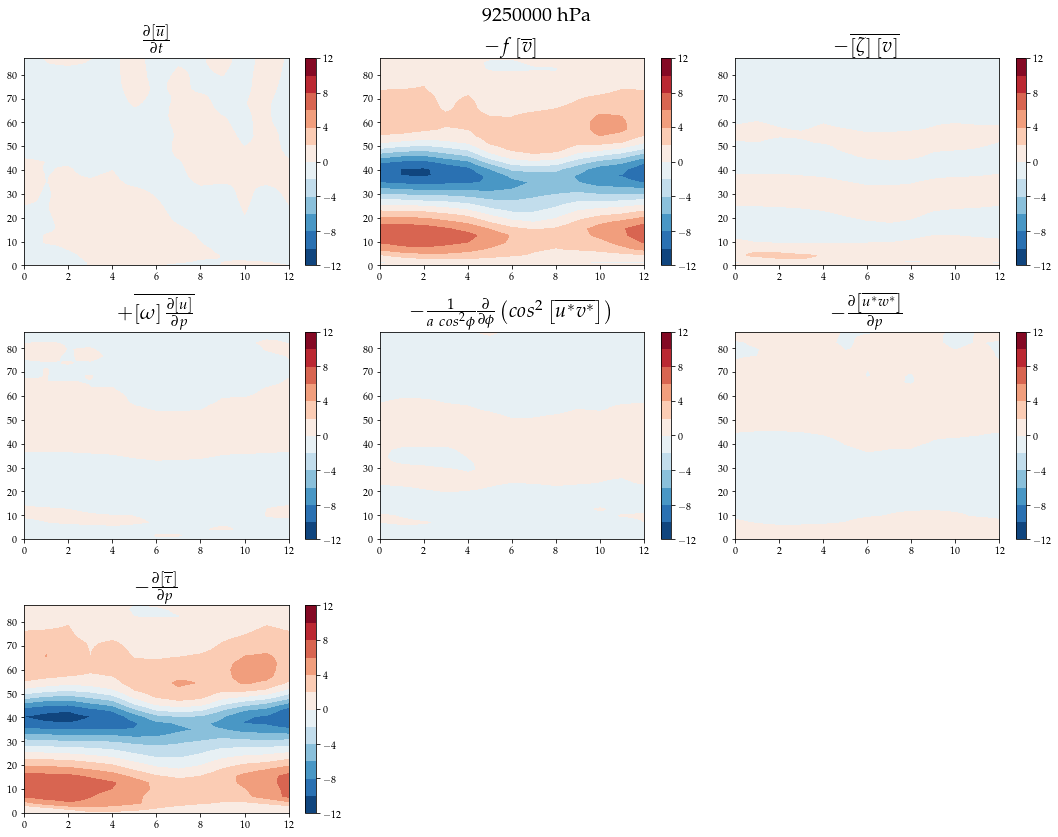

In [107]:
plot_contours(expi=1, p= -4, max=12)

In [98]:
# plot_contours(expi=2, p= 8, max=12)
# plot_contours(expi=3, p= 8, max=12)

In [99]:
# plot_contours(expi=2, p= -4, max=20)
# plot_contours(expi=3, p= -4, max=20)